### NAIVE BAYES

A naive Bayes classifier is an algorithm that uses Bayes' theorem to classify objects. 

Naive Bayes classifiers assume strong, or naive, independence between attributes of data points. 

Popular uses of naive Bayes classifiers include `spam filters`, `text analysis` and `medical diagnosis`. 

These classifiers are widely used for machine learning because they are simple to implement.

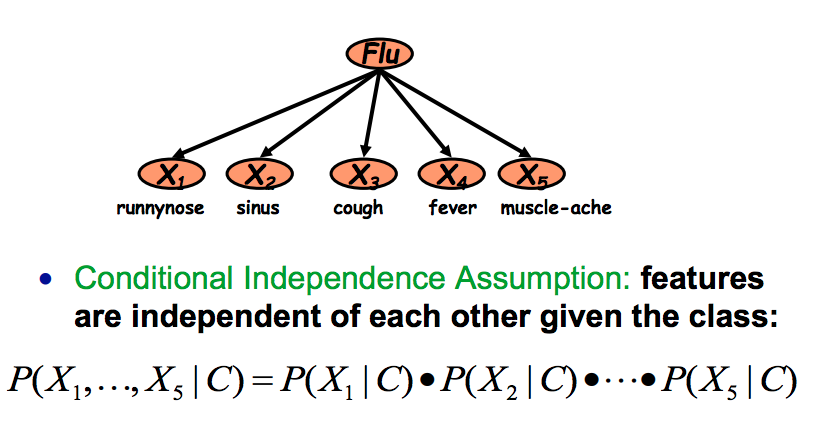

In [16]:
from IPython.display import Image
Image(filename='imgr10.png',width=470, height=470) 

### APPROACH : 

__A naive Bayes classifier uses probability theory to classify data. Naive Bayes classifier algorithms make use of Bayes' theorem. The key insight of Bayes' theorem is that the probability of an event can be adjusted as new data is introduced.__

What makes a naive Bayes classifier naive is its assumption that all attributes of a data point under consideration are independent of each other. 

For example, A classifier sorting fruits into apples and oranges would know that apples are red, round and are a certain size, but would not assume all these things at once. Oranges are round too, after all.

The most popular application is spam filters. A spam filter looks at email messages for certain key words and puts them in a spam folder if they match.

The more data it gets, the more accurate a naive Bayes classifier becomes, such as from a user flagging email messages in an inbox for spam.

`EXAMPLE : ` __FILTERING SPAM EMAILS USING NAIVE BAYES CLASSIFIER__

_Use Case_ : When we click an email as “Mark as Spam” button, we essentially update a database of sample __spam emails__. 
With this information, a computer program can collect statistics about various words or phrases contained in the mail that is suggestive of an email being spam or ham. 

For instance, it might note that 35% of spam emails contain the phrase “lottery”, or that 20%
contain the phrase “fast money”.

With these numbers, the Naive Bayes classifier now has all the information it needs to mark incoming emails as either legitimate or spam. 

When you receive a new message, the algorithm looks up statistics about all the words in it. And applies Bayes Probaility Rule on it.


 Bayes’ Theorem is useful when working with conditional probabilities


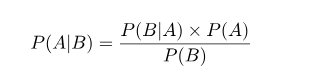

In [14]:
print("\n Bayes’ Theorem is useful when working with conditional probabilities")
Image(filename='imgr8.png',width=450, height=450) 

__`Bayes Theorem:`__

1. Calculate probability of every possible outcome and see which one turns out to be larger.

2. Above equation gives the basic representation of the Bayes’ theorem. Here A and B are two
   events and,

3. P(A|B) : the conditional probability that event A occurs , given that B has occurred. This is also known as the __posterior probability__.

4. P(A) and P(B) : probability of A and B without regard of each other.

5. P(B|A) : the conditional probability that event B occurs , given that A has occurred.

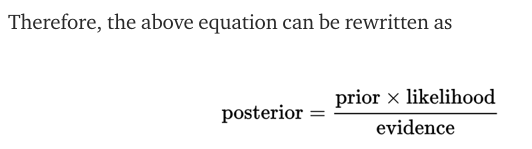

In [13]:
Image(filename='imgr9.png',width=450, height=450) 

### Building a spam filter using naïve bayes

To calculate the probability that e-mail is spam or
non-spam, we make use of Naive Bayes technique using Bayes theorem as shown in formula below -
Where, 
-  __P(spam|word)__ is probability that an e-mail has particular word given the e-mail is spam.

-  __P(spam)__ is probability that any given message is spam.
-  __P(word|spam)__ is probability that the particular word appears in spam message.

-  __P(non−spam)__ is the probability that any particular word is not spam.

- __P(word|non−spam)__ is the probability that the particular word appears in non-spam message.

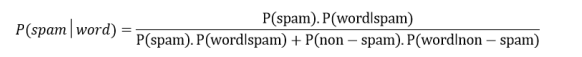

In [18]:
Image(filename='imgr11.png',width=700, height=700) 

`EVALUATION METRICS : `: Accuracy, Recall, Precision, F-measure, FP, FN, TP and TN in this context will be defined as follows:

- __Accuracy__: Percentage of correctly identified spam and not spam message.
- __Recall__: Percentage spam message that we manage to block out of actual blocked msgs.
- __Precision__: Percentage of correct message for spam e-mail over what we marked as spam.
- __F-measure__: Weighted average of precision and recall
- __False Positive (FP)__: The number of misclassified non spam emails
- __False Negative (FN)__: The number of misclassified spam emails
- __True Positive (TP)__: The number of spam messages are correctly classified as spam
- __True Negative (TN)__: The number of non-spam e-mail that is correctly classified as non-spam

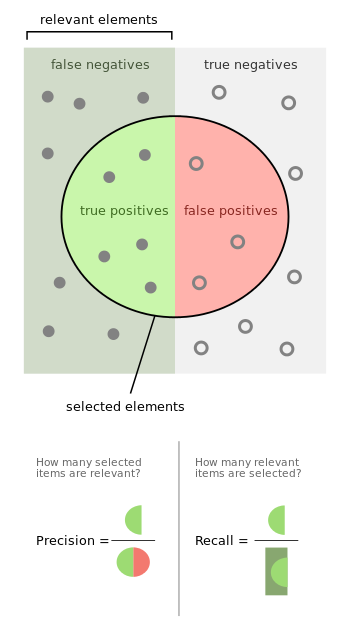

In [21]:
Image(filename='imgr12.png',width=300, height=730) 

__DATASET__ 

#### The data-set used here, is split into a training set and a test set containing 702 mails and 260 mails respectively, divided equally between spam and ham mails. You will easily recognize spam mails as it contains *spmsg* in its filename.

__SOURCE__ - Publicly open corpus on SPAM/HAM Data can be obtained from the given link -

https://www.dropbox.com/s/yjiplngoa430rid/ling-spam.zip

#### 1. CREATE WORD DICTIONARY

In [4]:
import os
import numpy as np
import collections
from collections import Counter
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [4]:
Counter?

In [15]:
def make_Dictionary(train_dir):
    emails = [os.path.join(train_dir,f) for f in os.listdir(train_dir)]    
    all_words = []       
    for mail in emails:    
        with open(mail) as m:
            for i,line in enumerate(m):
                if i == 2: 
                    words = line.split()
                    all_words += words
    
    dictionary = Counter(all_words)
    print(len(all_words))
    print("All words:", len(dictionary))
    #print("All words count:", dictionary)
    diction ={}
    list_to_include = dictionary.keys()
    for item in list_to_include:
        
        if item.isalpha == True:
            diction[item]=dictionary[item]
        
        elif len(item)>1:
            diction[item]=dictionary[item]
            
    dictionary = Counter(diction)
    print("Cleaned words: ",len(dictionary))
    #print("Cleaned words Items:", dictionary)
    dictionary_set = dictionary.most_common(3000) 
    print("Most Common:",len(dictionary_set))
    print("Most Common:",dictionary_set)
    ##3000 most frequently used words in the dictionary.
    return dictionary_set


In [16]:
# Create a dictionary of words with its frequency

train_dir = '/Users/ankitasinha/Desktop/data/spam_filetring_text_mails_data/train-mails'
dictionary_set = make_Dictionary(train_dir)
 


384905
All words: 20488
Cleaned words:  20422
Most Common: 3000
Most Common: [('20', 1764), ('order', 1414), ("'s", 1335), ('address', 1293), ('report', 1216), ('mail', 1127), ('send', 1079), ('language', 1072), ('email', 1051), ('program', 1001), ('our', 987), ('list', 935), ('one', 917), ('name', 878), ('receive', 826), ('money', 788), ('free', 762), ('work', 755), ('3d', 736), ("n't", 734), ('information', 677), ('business', 654), ('please', 652), ('e-mail', 598), ('university', 595), ('us', 564), ('day', 556), ('follow', 544), ('10', 543), ('internet', 520), ('over', 511), ('http', 479), ('check', 472), ('call', 469), ('each', 466), ('include', 452), ('com', 448), ('linguistic', 442), ('100', 438), ('number', 423), ('want', 420), ('letter', 419), ('need', 418), ('many', 412), ('here', 397), ('market', 395), ('start', 390), ('even', 386), ('fax', 383), ('form', 380), ('most', 377), ('first', 373), ('web', 366), ('service', 363), ('50', 363), ('interest', 362), ('software', 352), ('r

In [16]:
print(len(dictionary_set))
print(dict(dictionary_set))

3000
{'20': 1764, 'order': 1414, "'s": 1335, 'address': 1293, 'report': 1216, 'mail': 1127, 'send': 1079, 'language': 1072, 'email': 1051, 'program': 1001, 'our': 987, 'list': 935, 'one': 917, 'name': 878, 'receive': 826, 'money': 788, 'free': 762, 'work': 755, '3d': 736, "n't": 734, 'information': 677, 'business': 654, 'please': 652, 'e-mail': 598, 'university': 595, 'us': 564, 'day': 556, 'follow': 544, '10': 543, 'internet': 520, 'over': 511, 'http': 479, 'check': 472, 'call': 469, 'each': 466, 'include': 452, 'com': 448, 'linguistic': 442, '100': 438, 'number': 423, 'want': 420, 'letter': 419, 'need': 418, 'many': 412, 'here': 397, 'market': 395, 'start': 390, 'even': 386, 'fax': 383, 'form': 380, 'most': 377, 'first': 373, 'web': 366, 'service': 363, '50': 363, 'interest': 362, 'software': 352, 'remove': 349, 'read': 347, 'those': 345, 'week': 344, 'every': 332, 'credit': 329, 'll': 326, 'site': 320, 'much': 318, 'english': 318, 'edu': 318, 'product': 317, 'bulk': 312, 'phone': 31

#### 2. Feature extraction process

In [22]:
def extract_features(mail_dir): 
    files = [os.path.join(mail_dir,fi) for fi in os.listdir(mail_dir)]
    features_matrix = np.zeros((len(files),3000))
    docID = 0;
    for fil in files:
          with open(fil) as fi:
            for i,line in enumerate(fi):
                  if i == 2:
                    words = line.split()
                    for word in words:
                                #wordID = 0
                                  
                                for i,d in enumerate(dictionary_set):
                                    #print(d)
                                    if d[0] == word:
                                        wordID = i
                                        features_matrix[docID,wordID] = words.count(word)
            docID = docID + 1    
    return features_matrix

features_matrix[doci,wordi]

            word0 word1 word2 ...........word3000 label
doc_id1      27   23    43                  2       0

doc_id2      5                                     0

doc_id3                                            0

.
doc_id351                                          1
.
         doci,wordi
doc_id702


In [34]:
#Prepare feature vectors per training mail and its labels

train_labels = np.zeros(702)
#print(train_labels)

In [35]:
train_labels[351:701] = 1
#train_labels

In [23]:
train_matrix = extract_features(train_dir)

In [29]:
train_matrix.shape

(702, 3000)

In [59]:
print(train_matrix[500,:])

[0. 0. 0. ... 0. 0. 0.]


In [56]:
train_labels[500:510]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:

# Training SVM and Naive bayes classifier
 
model1 = MultinomialNB()
model1.fit(train_matrix,train_labels)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [67]:
model2 = LinearSVC()
model2.fit(train_matrix,train_labels)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [68]:
# Test the unseen mails for Spam
test_dir = '/Users/ankitasinha/Desktop/data/spam_filetring_text_mails_data/test-mails'


In [69]:
test_matrix = extract_features(test_dir)

In [70]:
test_labels = np.zeros(260)
test_labels[130:260] = 1

In [71]:
result1 = model1.predict(test_matrix)

In [72]:
result2 = model2.predict(test_matrix)

In [73]:
print(confusion_matrix(test_labels,result1))

[[129   1]
 [ 10 120]]


In [1]:
Image(filename='imgr13.png',width=500, height=500) 

NameError: name 'Image' is not defined

In [74]:
model1.score(test_matrix,test_labels)

0.9576923076923077

In [75]:
model2.score(test_matrix,test_labels)

0.9615384615384616

   `Interpretation of Confusion Metric `
   
Out of the 130 actual instances of ‘not spam’, the classifier predicted correctly _129_ of them and incorrectly predicted 1 of them.

Out of the 130 actual instances of ‘spam’ (second row), the classifier predicted correctly _120_ of them and incorrectly predicted 10 of them.

__Out of all 260 emails, the classifier predicted correctly 249 of them.__



In [20]:
# Calculate Accuracy, Precison, Recall and F-Score. 
# Check with following code : 
from sklearn.metrics import classification_report

print(classification_report(test_labels, result1))
#rep =classification_report(test_labels, result1)

print("SUMMARY--")
print("PRECISON : 0.96 Percentage of correct message for spam e-mail over what we marked as spam")
print("RECALL : 0.96 Percentage of spam message that we managed to block out of actual blocked msgs.")

             precision    recall  f1-score   support

        0.0       0.93      0.99      0.96       130
        1.0       0.99      0.92      0.96       130

avg / total       0.96      0.96      0.96       260

SUMMARY--
PRECISON : 0.96 Percentage of correct message for spam e-mail over what we marked as spam
RECALL : 0.96 Percentage of spam message that we managed to block out of actual blocked msgs.


F-Score  : It is useful when you need to take both precision and recall into account. If you try to only optimize recall, your algorithm will predict most examples to belong to the positive class, but that will result in many false positives and, hence, low precision. On the other hand, if you try to optimize precision, your model will predict very few examples as positive results (the ones which highest probability), but recall will be very low.

__`RESULTS USING NAIVE BAYES CLASSIFIER: `__ 

• __FP__: Total 1 number of misclassified non spam emails

• __FN__: Total 10 number of misclassified spam emails

• __TP__: Total 120 number of spam messages are correctly classified as spam

• __TN__: Total 129 number of non-spam e-mail that is correctly classified as non-spam

`__SVC Model Comparison__`

In [21]:

print(confusion_matrix(test_labels,result2))

[[126   4]
 [  6 124]]


In [22]:
model2.score(test_matrix,test_labels)

0.9615384615384616

In [23]:
print(classification_report(test_labels, result2))

             precision    recall  f1-score   support

        0.0       0.95      0.97      0.96       130
        1.0       0.97      0.95      0.96       130

avg / total       0.96      0.96      0.96       260



####  ROC AUC 

A more visual way to measure the performance of a binary classifier is the receiver operating characteristic (ROC) curve. It is created by plotting the true positive rate (TPR) (or recall) against the false positive rate (FPR)

FPR = FP/(FP+TN)

TPR = TP/(TP+FN)

The nice thing about the ROC curve is that we can visualize how the performance of the classifier changes as we vary the threshold. 

First, let’s plot the ROC curve for the case at hand by importing roc_curve from sklearn.metrics, which gives us the TP and FP rates:

In [6]:
from sklearn.metrics import roc_curve
roc_curve?

FPR: 0.0 , 0.007692307692307693 , 1.0
TPR 0.0 , 0.9230769230769231 , 1.0
thresholds [2. 1. 0.]


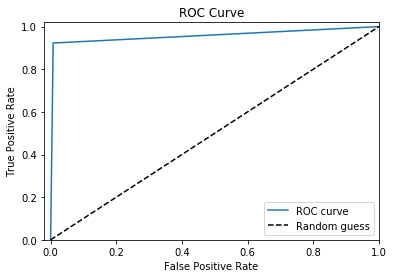

In [25]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt


fpr, tpr, thresholds = roc_curve(test_labels, result1)
print("FPR:",fpr[0],",",fpr[1],",",fpr[2])
print("TPR",tpr[0],",",tpr[1],",",tpr[2])
print("thresholds",thresholds)

# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")
plt.show()

__ANALYSIS of ROC: __

I. Suppose we take the threshold to be 0, that is, all emails are classified as spam. On the one hand, this implies that no spam emails are predicted as real emails and so there are no false negatives — the true positive rate (or recall) is 1. On the other hand, this also means that no real email is classified as real, and thus there are no true negatives — the false positive rate is also 1. This corresponds to the top-right part of the curve.

II. Now suppose that the threshold is 1, that is, no email is classified as spam. Then, there are no true positives (and thus the true positive rate is 0) and no false positives (and thus the false positive rate is 0). This corresponds to the bottom-left of the curve.

III. The rest of the curve corresponds to values of the threshold between 0 and 1, from the top-right to the bottom-left. As you can see, the curve approaches (but does not reach) the corner of the plot where the TP rate is 1 and the FP rate is 0 — that is, no spam emails are classified as real and no real emails are classified as spam. This is the point of perfect classification.

IV. If we are in the diagonal line, that means that the proportion of emails predicted as spam which turn out to be actual spam is roughly the same as the proportion of real emails which are predicted as spam but were not.

This is as good as _random guessing_, and a classifier with this performance would be pretty terrible.

The TP rate is the proportion of emails predicted as spam which are actually spam.
The FP rate is the proportion of actual real emails which are predicted as spam.


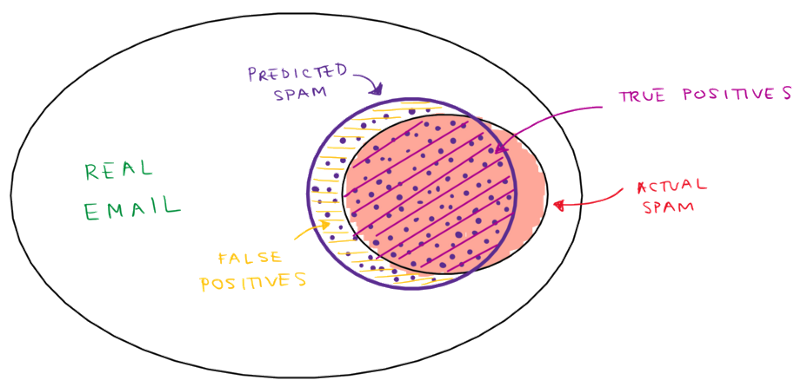

In [125]:
print("The TP rate is the proportion of emails predicted as spam which are actually spam.\nThe FP rate is the proportion of actual real emails which are predicted as spam.")
Image(filename='imgr14.png',width=500, height=500) 

The above points suggest that the area under the ROC curve (usually denoted by AUC) is a good measure of the performance of the classification algorithm.

If it is near 0.5, the classifier is not much better than random guessing, whereas it gets better as the area gets close to 1.

In [128]:
from sklearn.metrics import roc_auc_score
print("The output of our NB classifer is --")
roc_auc_score(test_labels, result1)

The output of our NB classifer is --


0.9576923076923077

The AUC is indeed quite close to 1, and so our classifier is very good at minimizing false negatives (spam which is classified as real) and true negatives (real email which is classified as real).

Note that, since we are taking the area under the whole ROC curve, the result is not related to any particular threshold. Therefore, a high AUC does not tell us which is the best threshold to obtain useful classification predictions.

#### Precision-recall curve

A good way to illustrate this trade-off between precision and recall is with the precision-recall curve.

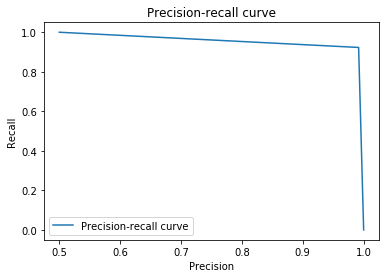

In [131]:
from sklearn.metrics import precision_recall_curve 

precision, recall, thresholds = precision_recall_curve(test_labels, result1)
# create plot
plt.plot(precision, recall, label='Precision-recall curve')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

__ANALYSIS :__ Note that the precision starts from roughly 0.5, as there aren’t many false positives (real emails classified as spam).

With the precision-recall curve, the closer it is to the top-right corner, the better the algorithm. And hence a larger area under the curve (AUC) indicates that the algorithm has higher recall and higher precision. In this context, the area is known as average precision

In [134]:
from sklearn.metrics import average_precision_score
print("AVERAGE PRECISION")
average_precision_score(test_labels, result1)

AVERAGE PRECISION


0.9539097266369995

These are just some of the metrics we can use to measure the performance of classifers

__DIY__: Some more datasets to try : http://www2.aueb.gr/users/ion/data/enron-spam/

-- LAB ENDS HERE--